In [36]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns




In [37]:
results = pd.read_csv('results.csv')
shootouts = pd.read_csv('shootouts.csv')
goalscorers = pd.read_csv('goalscorers.csv')
print(results.columns)
print(shootouts.columns)
print(goalscorers.columns)


Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')
Index(['date', 'home_team', 'away_team', 'winner', 'first_shooter'], dtype='object')
Index(['date', 'home_team', 'away_team', 'team', 'scorer', 'minute',
       'own_goal', 'penalty'],
      dtype='object')


In [38]:
print(results.head())
print(results.tail())

         date home_team away_team  home_score  away_score tournament     city  \
0  1872-11-30  Scotland   England           0           0   Friendly  Glasgow   
1  1873-03-08   England  Scotland           4           2   Friendly   London   
2  1874-03-07  Scotland   England           2           1   Friendly  Glasgow   
3  1875-03-06   England  Scotland           2           2   Friendly   London   
4  1876-03-04  Scotland   England           3           0   Friendly  Glasgow   

    country  neutral  
0  Scotland    False  
1   England    False  
2  Scotland    False  
3   England    False  
4  Scotland    False  
             date    home_team    away_team  home_score  away_score  \
48330  2025-06-10       Serbia      Andorra           3           0   
48331  2025-06-10       Latvia      Albania           1           1   
48332  2025-06-10  New Zealand      Ukraine           1           2   
48333  2025-06-10       Canada  Ivory Coast           0           0   
48334  2025-06-10   

In [39]:
print(shootouts.head())
print(shootouts.tail())

         date    home_team         away_team       winner first_shooter
0  1967-08-22        India            Taiwan       Taiwan           NaN
1  1971-11-14  South Korea  Vietnam Republic  South Korea           NaN
2  1972-05-07  South Korea              Iraq         Iraq           NaN
3  1972-05-17     Thailand       South Korea  South Korea           NaN
4  1972-05-19     Thailand          Cambodia     Thailand           NaN
           date   home_team    away_team      winner first_shooter
642  2024-07-06     Uruguay       Brazil     Uruguay       Uruguay
643  2024-07-13      Canada      Uruguay     Uruguay        Canada
644  2024-09-08  Tajikistan  Philippines  Tajikistan           NaN
645  2024-09-10    Cambodia    Sri Lanka   Sri Lanka      Cambodia
646  2025-06-08    Portugal        Spain    Portugal      Portugal


In [40]:
print(goalscorers.head())
print(goalscorers.tail())

         date  home_team away_team       team            scorer  minute  \
0  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    44.0   
1  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    55.0   
2  1916-07-02      Chile   Uruguay    Uruguay  Isabelino Gradín    70.0   
3  1916-07-02      Chile   Uruguay    Uruguay   José Piendibene    75.0   
4  1916-07-06  Argentina     Chile  Argentina     Alberto Ohaco     2.0   

   own_goal  penalty  
0     False    False  
1     False    False  
2     False    False  
3     False    False  
4     False    False  
             date  home_team away_team       team            scorer  minute  \
44357  2024-07-13     Canada   Uruguay    Uruguay       Luis Suárez    90.0   
44358  2024-07-14  Argentina  Colombia  Argentina  Lautaro Martínez   112.0   
44359  2024-07-14      Spain   England      Spain     Nico Williams    47.0   
44360  2024-07-14      Spain   England    England       Cole Palmer    73.0   
44361  2024-07-1

In [41]:
print(results.shape)
print(shootouts.shape)
print(goalscorers.shape)

(48335, 9)
(647, 5)
(44362, 8)


In [42]:
print(results.isnull().sum())
print(shootouts.isnull().sum())
print(goalscorers.isnull().sum())

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64
date               0
home_team          0
away_team          0
winner             0
first_shooter    415
dtype: int64
date           0
home_team      0
away_team      0
team           0
scorer        49
minute       259
own_goal       0
penalty        0
dtype: int64


In [43]:
results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48335 entries, 0 to 48334
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   date        48335 non-null  object
 1   home_team   48335 non-null  object
 2   away_team   48335 non-null  object
 3   home_score  48335 non-null  int64 
 4   away_score  48335 non-null  int64 
 5   tournament  48335 non-null  object
 6   city        48335 non-null  object
 7   country     48335 non-null  object
 8   neutral     48335 non-null  bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 3.0+ MB


In [44]:
shootouts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647 entries, 0 to 646
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           647 non-null    object
 1   home_team      647 non-null    object
 2   away_team      647 non-null    object
 3   winner         647 non-null    object
 4   first_shooter  232 non-null    object
dtypes: object(5)
memory usage: 25.4+ KB


In [45]:
goalscorers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44362 entries, 0 to 44361
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       44362 non-null  object 
 1   home_team  44362 non-null  object 
 2   away_team  44362 non-null  object 
 3   team       44362 non-null  object 
 4   scorer     44313 non-null  object 
 5   minute     44103 non-null  float64
 6   own_goal   44362 non-null  bool   
 7   penalty    44362 non-null  bool   
dtypes: bool(2), float64(1), object(5)
memory usage: 2.1+ MB


In [46]:
results.describe()

,home_score,away_score
count,48335.000000,48335.000000
mean,1.758477,1.181194
std,1.773333,1.400151
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,1.000000
75%,2.000000,2.000000
max,31.000000,21.000000


In [47]:
shootouts.describe()

,date,home_team,away_team,winner,first_shooter
count,647,647,647,647,232
unique,570,181,190,175,88
top,2024-03-26,South Africa,Egypt,Argentina,Colombia
freq,5,18,15,15,11


In [48]:
goalscorers.describe().round(2)

,minute
count,44103.00
mean,50.01
std,26.36
min,1.00
25%,28.00
50%,51.00
75%,73.00
max,122.00


In [49]:
results['date'] = pd.to_datetime(results['date'], format='%Y-%m-%d')
#results['year'] = results['date'].dt.year
results.date.head()

0   1872-11-30
1   1873-03-08
2   1874-03-07
3   1875-03-06
4   1876-03-04
Name: date, dtype: datetime64[ns]

In [50]:
#Join results with shootouts for later analysis.
#Changed the date column in results to datetime format

#Create a SQLite database and store the DataFrames
conn = sqlite3.connect('your_database.db')
results.to_sql('results', conn, if_exists='replace', index=False)
shootouts.to_sql('shootouts', conn, if_exists='replace', index=False)

#SQL query to join results with shootouts
results_join = """SELECT *
FROM results
LEFT JOIN shootouts
ON results.date = shootouts.date;
"""

#Execute the query and load the results into a DataFrame
df_results_join = pd.read_sql_query(results_join, conn)
print(df_results_join.head())
conn.close()


                  date home_team away_team  home_score  away_score tournament  \
0  1872-11-30 00:00:00  Scotland   England           0           0   Friendly   
1  1873-03-08 00:00:00   England  Scotland           4           2   Friendly   
2  1874-03-07 00:00:00  Scotland   England           2           1   Friendly   
3  1875-03-06 00:00:00   England  Scotland           2           2   Friendly   
4  1876-03-04 00:00:00  Scotland   England           3           0   Friendly   

      city   country  neutral  date home_team away_team winner first_shooter  
0  Glasgow  Scotland        0  None      None      None   None          None  
1   London   England        0  None      None      None   None          None  
2  Glasgow  Scotland        0  None      None      None   None          None  
3   London   England        0  None      None      None   None          None  
4  Glasgow  Scotland        0  None      None      None   None          None  


In [51]:
print(df_results_join.tail(15))

                      date     home_team    away_team  home_score  away_score  \
48320  2025-06-10 00:00:00   South Korea       Kuwait           4           0   
48321  2025-06-10 00:00:00        Jordan         Iraq           0           1   
48322  2025-06-10 00:00:00     Palestine         Oman           1           1   
48323  2025-06-10 00:00:00      China PR      Bahrain           1           0   
48324  2025-06-10 00:00:00         Japan    Indonesia           6           0   
48325  2025-06-10 00:00:00  Saudi Arabia    Australia           1           2   
48326  2025-06-10 00:00:00   Netherlands        Malta           8           0   
48327  2025-06-10 00:00:00       Finland       Poland           2           1   
48328  2025-06-10 00:00:00    San Marino      Austria           0           4   
48329  2025-06-10 00:00:00       Romania       Cyprus           2           0   
48330  2025-06-10 00:00:00        Serbia      Andorra           3           0   
48331  2025-06-10 00:00:00  

In [52]:
# Create a new SQLite connection and dataframe using the results and shootouts tables with only matches from FIFA World Cup matches.
conn = sqlite3.connect('your_database.db')
results.to_sql('results', conn, if_exists='replace', index=False)
shootouts.to_sql('shootouts', conn, if_exists='replace', index=False)


results_WC = """SELECT results.date AS match_date,
    results.home_team,
    results.away_team,
    results.home_score,
    results.away_score,
    results.tournament
FROM results
LEFT JOIN shootouts
ON results.date = shootouts.date
WHERE results.tournament = 'FIFA World Cup';
"""

df_WC = pd.read_sql_query(results_WC, conn)
print(df_WC.head())

conn.close()

#convert the date column to datetime
df_WC['match_date'] = pd.to_datetime(df_WC['match_date'], errors='coerce')

            match_date  home_team      away_team  home_score  away_score  \
0  1930-07-13 00:00:00    Belgium  United States           0           3   
1  1930-07-13 00:00:00     France         Mexico           4           1   
2  1930-07-14 00:00:00     Brazil     Yugoslavia           1           2   
3  1930-07-14 00:00:00       Peru        Romania           1           3   
4  1930-07-15 00:00:00  Argentina         France           1           0   

       tournament  
0  FIFA World Cup  
1  FIFA World Cup  
2  FIFA World Cup  
3  FIFA World Cup  
4  FIFA World Cup  


In [53]:
#This was the suggestion from copilot - 
country_counts = df_WC['home_team'].value_counts().add(df_WC['away_team'].value_counts(), fill_value=0)
country_count = df_WC['home_team'].nunique() + df_WC['away_team'].nunique()
print(f"Total number of unique countries in FIFA World Cup matches: {country_count}")
print("Number of matches per country:")
print(country_counts.sort_values(ascending=False).head(10))

Total number of unique countries in FIFA World Cup matches: 159
Number of matches per country:
Brazil         114.0
Germany        112.0
Argentina       88.0
Italy           83.0
England         74.0
France          73.0
Spain           67.0
Mexico          60.0
Uruguay         59.0
Netherlands     55.0
Name: count, dtype: float64


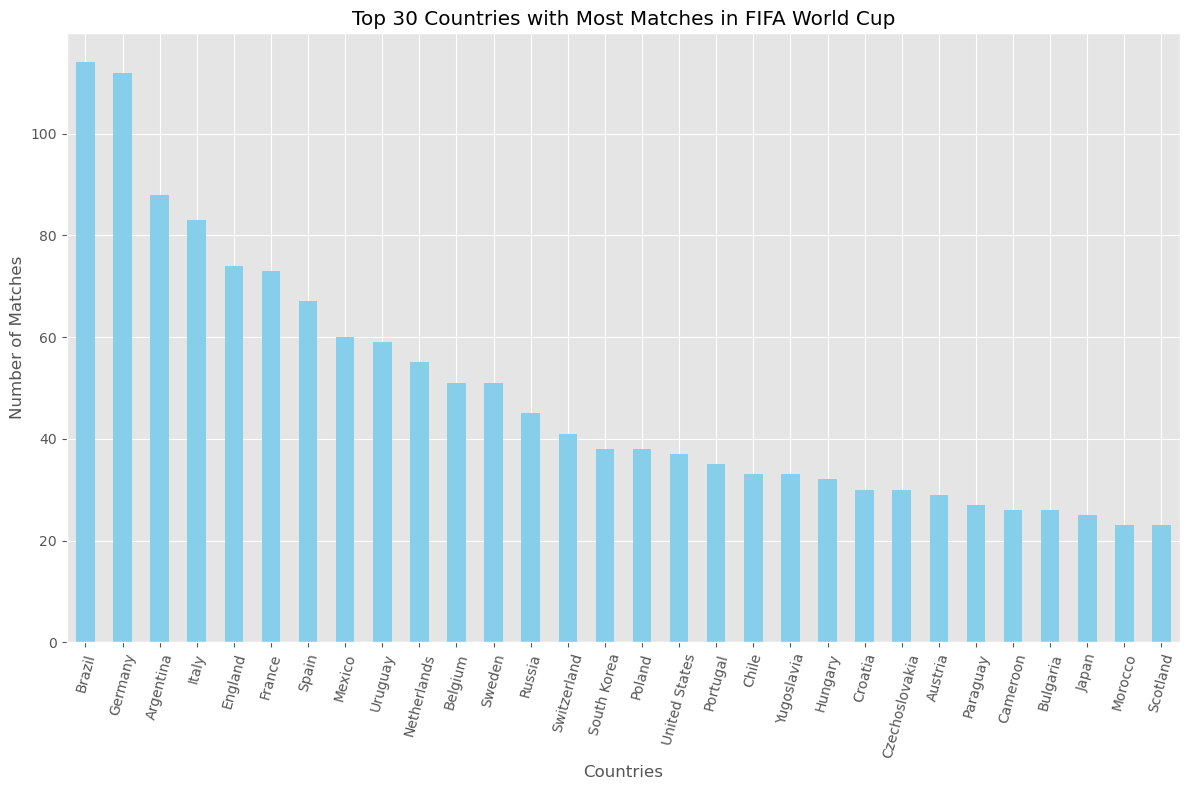

In [54]:
#Plotting the top 30 countries with the most matches in FIFA World Cup
#There are 30 countries in this graph to capture a couple countries that no longer exist (Czechoslovakia and Yugoslavia)
"""
The three lines below were suggest by copilot in addition to the plotting code beneath the comment.
plt.style.use('ggplot')
country_counts = df_WC['home_team'].value_counts().add(df_WC['away_team'].value_counts(), fill_value=0)
print(country_counts.sort_values(ascending=False).head(10))
"""

plt.figure(figsize=(12, 8))
top_countries = country_counts.sort_values(ascending=False).head(30)
top_countries.plot(kind='bar', color='skyblue')
plt.title('Top 30 Countries with Most Matches in FIFA World Cup')
plt.xlabel('Countries')
plt.ylabel('Number of Matches')
plt.xticks(rotation=75)
plt.tight_layout()
plt.show()

In [55]:
# Function to get match results by country - This was suggested by copilot
def get_match_results_by_country(country):
    """
    Returns the match results for a specific country in FIFA World Cup matches.
    """
    country_results = df_WC[(df_WC['home_team'] == country) | (df_WC['away_team'] == country)]
    return country_results

get_match_results_by_country('Croatia')  # Example usage to get results for Brazil

,match_date,home_team,away_team,home_score,away_score,tournament
527,1998-06-14,Jamaica,Croatia,1,3,FIFA World Cup
541,1998-06-20,Japan,Croatia,0,1,FIFA World Cup
560,1998-06-26,Argentina,Croatia,1,0,FIFA World Cup
571,1998-06-30,Romania,Croatia,0,1,FIFA World Cup
574,1998-07-04,Germany,Croatia,0,3,FIFA World Cup
577,1998-07-08,France,Croatia,2,1,FIFA World Cup
578,1998-07-11,Netherlands,Croatia,1,2,FIFA World Cup
589,2002-06-03,Croatia,Mexico,0,1,FIFA World Cup
604,2002-06-08,Italy,Croatia,1,2,FIFA World Cup
621,2002-06-13,Ecuador,Croatia,1,0,FIFA World Cup


In [56]:
#Average number of shootouts per World Cup
# Co Pilot suggestion - average_shootouts = df_WC['match_date'].dt.year.value_counts().mean()
average_shootouts = df_WC['match_date'].dt.year.value_counts().mean()
print(f"Average number of shootouts per World Cup: {average_shootouts:.2f}")

# Group by year and count the number of shootouts
shootouts_per_year = df_WC['match_date'].dt.year.value_counts().sort_index()
print(f"Number of shootouts per World Cup year:")
print(shootouts_per_year)


Average number of shootouts per World Cup: 43.82
Number of shootouts per World Cup year:
match_date
1930    18
1934    17
1938    18
1950    22
1954    26
1958    35
1962    32
1966    32
1970    32
1974    38
1978    38
1982    52
1986    52
1990    52
1994    52
1998    64
2002    64
2006    64
2010    64
2014    64
2018    64
2022    64
Name: count, dtype: int64


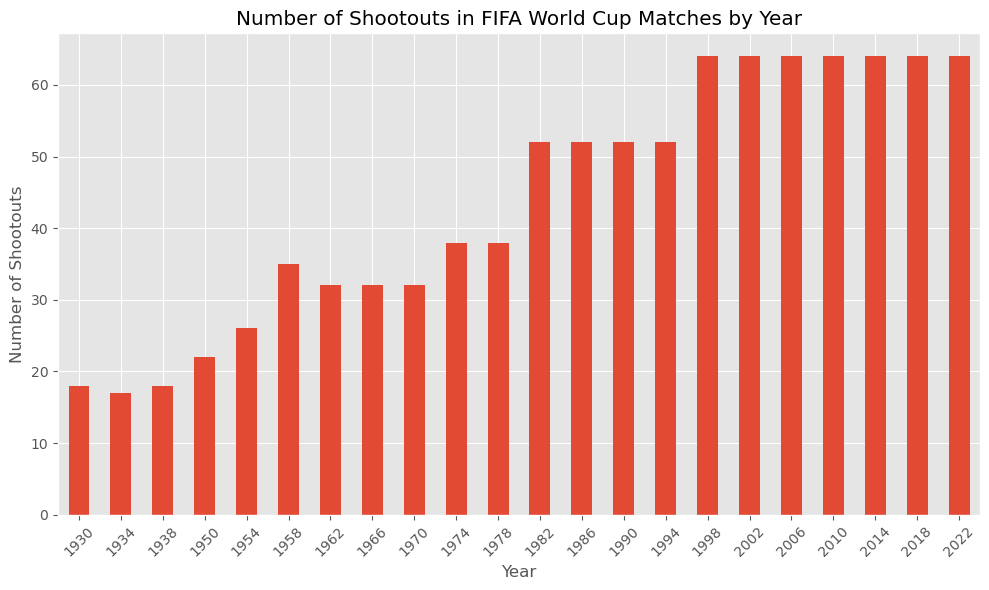

In [57]:
#df_WC is a joined table of shootouts and results that only include World Cup matches



# Bar graph plotting the number of shootouts per year in World Cup matches.
df_WC['year'] = df_WC['match_date'].dt.year
plt.figure(figsize=(10, 6))
df_WC['year'].value_counts().sort_index().plot(kind='bar')
plt.title('Number of Shootouts in FIFA World Cup Matches by Year')
plt.xlabel('Year')
plt.ylabel('Number of Shootouts')
plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig('shootouts_per_year.png')
plt.show()